<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Lecture_Note_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**
Logistic regression is a statistical method used for classification that predicts the probability of a **binary outcome** (e.g., **yes or no**, **1 or 0**, **True or False**) based on predictor variables. It works by fitting an S-shaped curve to the data to model the relationship between the independent variables and the probability of the dependent variable occurring. Common applications include email spam detection and medical diagnosis.

**How it works**
* **Models probability:** Instead of predicting a continuous value like linear regression, logistic regression predicts the probability that an observation belongs to a particular class.
* **Uses an S-shaped curve:** It uses a logistic function (or sigmoid function) to transform a linear combination of predictors into a probability between 0 and 1, resulting in an S-shaped curve.
* **Classifies the outcome:** A threshold (often 0.5) is used to classify the probability into one of two discrete categories. For example, if the probability is greater than 0.5, it's classified as "yes" (or 1); otherwise, it's "no" (or 0).

### **Logistic Regression Function**
Logistic regression models the probability of a binary outcome using the **logistic** or **sigmoid** function. There are two components to the prediction function:
* Linear predictor: $z = c + m_1x_1 + m_2x_2 + ... + m_nx_n$
* Probability: $p(y = 1 | x) = σ(z) = \dfrac{1}{1 + e^{-z}}$




### **Sigmoid or Logistic Function**
The sigmoid function (name from the Greek letter *sigma*) is designed to convert numbers on a linear continuous scale into a logistic classification of either one or zero. It is made with an exponential function $e^{-z}$ which is flipped around the horizontal and vertical axis, using a series of mathematical transformations:

$y = e^x$ *(exponential equation)*

$y = e^{-x}$ *($e^x$ flipped horizontally)*

**Sigmoid function:**

$y = \dfrac{1}{1 + e^{-x}}$ *($e^x$ flipped horizontally and vertically)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

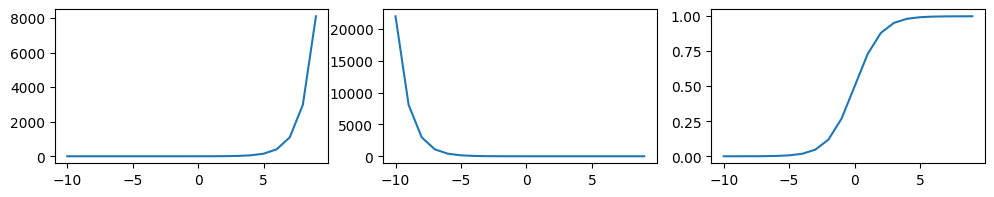

In [2]:
# X-values from -10 to 10
X = np.array(list(range(-10, 10)))
fig, axs = plt.subplots(1, 3, figsize=(12, 2))

# Exponent function, y = exp(x)
axs[0].plot(X, np.exp(X))

# Negative exponent function, y = exp(-x)
axs[1].plot(X, np.exp(-X))

# Sigmoid / logistic function, y = 1 / (1 + exp(-x))
axs[2].plot(X, 1 / (1 + np.exp(-X)))

plt.show()

The steepness of the middle section of the logistic function can be adjusted by applying a constant to the exponent: $y = \dfrac{1}{1 + e^{-cx}}$.
Thus, increasing $c$ increases the steepness.


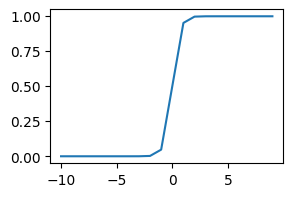

In [6]:
c = 3
X = np.array(list(range(-10, 10)))
Y = 1 / (1 + np.exp(-c * X))

plt.figure(figsize=(3, 2))
plt.plot(X, Y)
plt.show()

### **Cost Function for Logistic Regression**
The loss function used for training logistic regression models is the negative log-likelihood (or binary cross entropy).
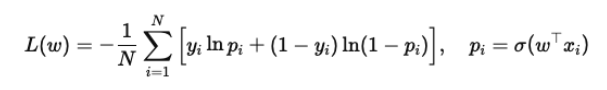


It is built by combining two piecewise equations:

1) $-ln(p^{(i)})$ *(when the actual value is 1.0)*

2) $-ln(1 - p^{(i)})$ *(when the actual value is 0.0)*

This is to ensure the calculated loss is zero once the predicted value is very close to the actual value, irrespective of the numerical difference.

Since the actual value is $y_i$, these two are combined into one loss equation for each data point:
$$error, e^{(i)} = -\big[y^{(i)}ln(p^{(i)}) + (1-y^{(i)})ln(1-p^{(i)})\big]$$

So, the cost function is the average of the loss for all sample data points:

$$L(w) = -\frac{1}{N}\sum_{i=1}^N{e^{(i)}} = -\dfrac{1}{N}\sum_{i=1}^N{\big[y^{(i)}ln(p^{(i)}) + (1-y^{(i)})ln(1-p^{(i)})\big]}$$

**where:**

$$p^{(i)} = \sigma(w^\top x^{(i)}) = \sigma(c + m_1x_1 + m_2x_2 + ... + m_nx_n)$$

In this non-vectorized formulation, we can explain it as follows. If you have $N$ sample points of $y^{(0)}, y^{(1)}, ..., y^{(N)}$, then the total error is the sum of the loss or error from each prediction, where each error, $e^{(i)}$ is the negative log-likelihood / binary cross-entropy equation, $e^{(i)} = -\big[y^{(i)}ln(p^{(i)}) + (1-y^{(i)})ln(1-p^{(i)})\big]$.

And we calculate the predicted value from the sigmoid function of the multivariable linear equation.

```python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# For 3 independent variables and a constant bias
y_pred = sigmoid(m1 * x1 + m2 * x2 + m3 * x3 + c)
```

```python
# Pseudo-code
error_0 = y_0 * log(y_pred_0) + (1 - y_0) * log(1 - y_pred_0)
error_1 = y_1 * log(y_pred_1) + (1 - y_1) * log(1 - y_pred_1)
error_2 = y_2 * log(y_pred_2) + (1 - y_2) * log(1 - y_pred_2)
:         :                      :
:         :                      :
error_N = y_N * log(y_pred_N) + (1 - y_N) * log(1 - y_pred_N)

error = sum(error_0, error_1, error_2, ..., error_N)
```





Below is a visualization of the two parts of the negative log-likelihood loss function

/tmp/ipython-input-3678865060.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(P, -np.log(P), 'o')
/tmp/ipython-input-3678865060.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(P, -np.log(1 - P), 'o')


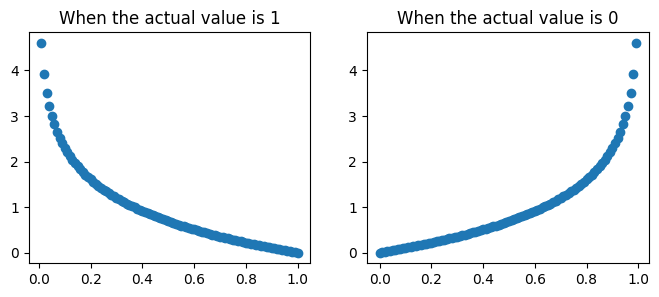

In [ ]:
# When the actual value is 1.
P = np.array(range(0, 101)) / 100

plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plt.plot(P, -np.log(P), 'o')
plt.title('When the actual value is 1')

# When the actual value is 0.
plt.subplot(1,2,2)
plt.plot(P, -np.log(1 - P), 'o')
plt.title('When the actual value is 0')

plt.show()

## **Gradient of Logistic Regression**
The non-vectorized (element-wise or loop-based) form of the gradient of the Negative Log-Likelihood (NLL) function for a logistic regression model with respect to a single weight parameter $w_j$ is typically expressed as a summation over all individual training examples.

**Gradient:**
$g = \nabla_{w}L = \dfrac{1}{𝑁}X^\top(p - y)$

#### **For a single training example**
The contribution to the gradient for the $i$-th example is:

$$\dfrac{\partial \text{NLL}_{i}}{\partial w_{j}}=(p^{(i)}-y^{(i)})\cdot x_{j}^{(i)}$$

where:

- $y^{(i)}$ is the true binary label (0 or 1) for the $i$-th example.
- $x_{j}^{(i)}$ is the value of the $j$-th feature for the $i$-th example.
- $p^{(i)}$ is the predicted probability for the $i$-th example, calculated using the sigmoid function: $p^{(i)}=\sigma (w\cdot x^{(i)})=\dfrac{1}{1+e^{-w\cdot x^{(i)}}}$.

#### **For the entire dataset (Batch Gradient Descent)**

To get the full gradient for the entire dataset, you sum the contributions over all $N$ training examples and typically average by dividing by $N$ (or $n$, depending on notation):

$$\dfrac{\partial \text{NLL}}{\partial w_{j}} = \dfrac{1}{N}\sum_{i=1}^{N}\big(p^{(i)}-y^{(i)}\big)\cdot x_{j}^{(i)}$$

**where:** $i$ = each sample, $j$ = each coefficient / feature

So, following from the case above, if we had 3 independent variables and 1 constant bias:

$dm_1 = \dfrac{1}{N}\big[x_1^{(0)}(p^{(0)} - y^{(0)}) + x_1^{(1)}(p^{(1)} - y^{(1)}) + x_1^{(2)}(p^{(2)} - y^{(2)}) + ... + x_1^{(N)}(p^{(N)} - y^{(N)})\big]$

$dm_2 = \dfrac{1}{N}\big[x_2^{(0)}(p^{(0)} - y^{(0)}) + x_2^{(1)}(p^{(1)} - y^{(1)}) + x_2^{(2)}(p^{(2)} - y^{(2)}) + ... + x_2^{(N)}(p^{(N)} - y^{(N)})\big]$

$dm_3 = \dfrac{1}{N}\big[x_3^{(0)}(p^{(0)} - y^{(0)}) + x_3^{(1)}(p^{(1)} - y^{(1)}) + x_3^{(2)}(p^{(2)} - y^{(2)}) + ... + x_3^{(N)}(p^{(N)} - y^{(N)})\big]$

$dc = \dfrac{1}{N}\big[(p^{(0)} - y^{(0)}) + (p^{(1)} - y^{(1)}) + (p^{(2)} - y^{(2)}) + ... + (p^{(N)} - y^{(N)})\big]$


```python
# To make the code cleaner, we can separately calculate the gradient contribution due to each sample point.
grad_0 = (y_pred_0 - y_0) # gradient contribution from first sample point
grad_1 = (y_pred_1 - y_1) # gradient contribution from second sample point
grad_2 = (y_pred_2 - y_2) # gradient contribution from third sample point
grad_3 = (y_pred_3 - y_3) # gradient contribution from fourth sample point
# ...and so on for all N sample points. Of course, this would be done in a loop.

# For each parameter, there is a component of the gradient
# that its own independent x values contributes to. We take
# the average for all the sample points.
dm1 = mean(grad_0 * x1_0 + grad_1 * x1_1 + grad_2 * x1_2 + grad_3 * x1_3 + ...)
dm2 = mean(grad_0 * x2_0 + grad_1 * x2_1 + grad_2 * x2_2 + grad_3 * x2_3 + ...)
dm3 = mean(grad_0 * x3_0 + grad_1 * x3_1 + grad_2 * x3_2 + grad_3 * x3_3 + ...)
dc = mean(grad_0 + grad_1 + grad_2 + grad_3 + ...)
# where xi_j is the value of xi for the jth sample point.
```

### **Code example using non-vectorized loops.**
We will first solve a simple logistic regression problem using the partially vectorized method, by calculating the cost and the gradients of each coefficient separately.

For this example, we have a simple logistic regression problem with 3 parameters and 10 data points. The 3 parameters are two coefficients, $m_1$, $m_2$ and a constant bias $c$.

In [7]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Logistic Regression with 3 parameters (2 coefficients and 1 constant bias)
input = "0 -1.378131 -1.739044 0 1 -0.188089 0.127572 0 2 0.726551 0.728151 1 3 0.680423 -0.678781 1 4 -1.170806 -0.705662 0 5 0.643057 0.510177 1 6 -0.364640 -0.567086 0 7 0.786642 -0.339034 1 8 -0.559277 -0.463319 0 9 0.338181 -0.844260 1 10 -1.581644 -1.462096 0 11 -0.428931 1.142782 0 12 0.603689 -0.520002 1 13 1.259862 -0.512659 1 14 -0.806196 -1.128796 0 15 0.269235 1.099966 0 16 1.314846 1.729587 1 17 2.159750 1.646843 1 18 0.544015 1.676457 0 19 -1.500738 -1.755901 0 20 -0.705409 -0.844826 0 21 -0.232155 -0.815300 1 22 2.273348 0.876674 1 23 -1.223711 0.517269 0 24 -0.045207 -0.451564 1 25 -1.854701 -1.670888 0 26 -0.191340 0.004305 0 27 0.241905 0.002186 1 28 1.128693 1.517249 1 29 -0.374702 0.549459 0 30 1.078368 -0.398300 1 31 -0.566391 0.750064 0 32 0.698139 0.008859 1 33 1.507107 0.693768 1 34 0.733770 -0.180240 1 35 -1.271291 -1.490219 0 36 -0.657197 0.456859 0 37 -1.303600 -1.468382 0 38 -0.590740 -0.021391 0 39 0.866425 -0.510817 1 40 -0.949990 -0.257228 0 41 -0.025387 -0.740762 1 42 0.409532 -0.048076 1 43 -0.225961 0.778602 0 44 -1.669467 -1.150938 0 45 -0.767975 -0.243861 0 46 0.040591 -0.018018 0 47 0.642708 0.599433 1 48 -2.420146 -1.746991 0 49 0.498193 0.132640 1"
input = input.split(" ")
X1 = np.array(input[1::4], dtype=float)
X2 = np.array(input[2::4], dtype=float)
X = np.column_stack((X1, X2))
Y = np.array(input[3::4], dtype=float)
X, Y

(array([[-1.378131e+00, -1.739044e+00],
        [-1.880890e-01,  1.275720e-01],
        [ 7.265510e-01,  7.281510e-01],
        [ 6.804230e-01, -6.787810e-01],
        [-1.170806e+00, -7.056620e-01],
        [ 6.430570e-01,  5.101770e-01],
        [-3.646400e-01, -5.670860e-01],
        [ 7.866420e-01, -3.390340e-01],
        [-5.592770e-01, -4.633190e-01],
        [ 3.381810e-01, -8.442600e-01],
        [-1.581644e+00, -1.462096e+00],
        [-4.289310e-01,  1.142782e+00],
        [ 6.036890e-01, -5.200020e-01],
        [ 1.259862e+00, -5.126590e-01],
        [-8.061960e-01, -1.128796e+00],
        [ 2.692350e-01,  1.099966e+00],
        [ 1.314846e+00,  1.729587e+00],
        [ 2.159750e+00,  1.646843e+00],
        [ 5.440150e-01,  1.676457e+00],
        [-1.500738e+00, -1.755901e+00],
        [-7.054090e-01, -8.448260e-01],
        [-2.321550e-01, -8.153000e-01],
        [ 2.273348e+00,  8.766740e-01],
        [-1.223711e+00,  5.172690e-01],
        [-4.520700e-02, -4.515640e-01],


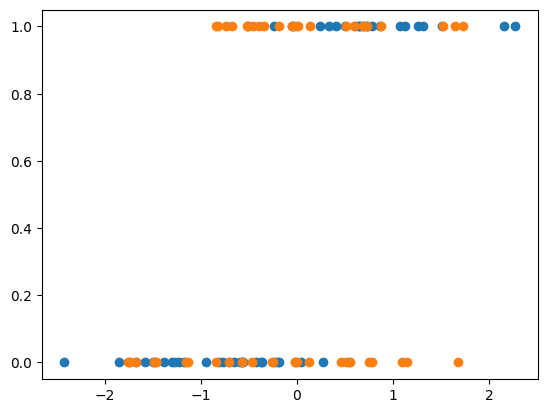

In [ ]:
# Plot the values X and Y
plt.plot(X, Y, 'o')
plt.show()

In [ ]:
# Define logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Initialize training parameters and hyperparameters
m0, m1, m2 = 0.5, 0.5, 0.5
alpha = 0.01
costs = []
epochs = 100000

In [ ]:
# Visualization of predictions, cost and gradient for each data point.
Y_pred = sigmoid(m0 + m1 * X[:, 0] + m2 * X[:, 1])
cost = -(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
raw_residual = Y_pred - Y

# Gradients for each parameter
dm0 = raw_residual
dm1 = raw_residual * X[:, 0]
dm2 = raw_residual * X[:, 1]

# Make Y_pred, Y, cost into a pandas dataframe. This allows us to
# have an intuitive view of the impact of the NLL cost function.

df = pd.DataFrame({
    'Y_pred': Y_pred, 'Y': Y, 'cost': cost,
    'dm0': dm0, 'dm1': dm1, 'dm2': dm2,
})
print('dm0:', np.mean(dm0), '\ndm1:', np.mean(dm1), '\ndm2:', np.mean(dm2))
df.head(10)

dm0: 0.12411462332262964 
dm1: -0.2313112168018857 
dm2: 0.02418160155819293


,Y_pred,Y,cost,dm0,dm1,dm2
0,0.257579,0.0,0.297839,0.257579,-0.354978,-0.447942
1,0.615323,0.0,0.955350,0.615323,-0.115735,0.078498
2,0.773355,1.0,0.257018,-0.226645,-0.164669,-0.165032
3,0.622652,1.0,0.473767,-0.377348,-0.256756,0.256136
4,0.392162,0.0,0.497847,0.392162,-0.459145,-0.276734
5,0.745853,1.0,0.293226,-0.254147,-0.163431,-0.129660
6,0.508533,0.0,0.710361,0.508533,-0.185432,-0.288382
7,0.673444,1.0,0.395350,-0.326556,-0.256883,0.110714
8,0.497176,0.0,0.687514,0.497176,-0.278059,-0.230351
9,0.561428,1.0,0.577271,-0.438572,-0.148317,0.370269


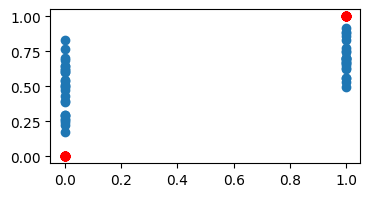

In [ ]:
# Plot Y vs. Y_pred before training, using the initial parameter values
plt.figure(figsize=(4, 2))
plt.scatter(Y, Y_pred)
plt.scatter(Y, Y, color='red')
plt.show()

cost: 0.03657334009348402 
dm0: 0.0004032563316119389 
dm1: -0.0035091015479737087 
dm2: 0.002068454495868073


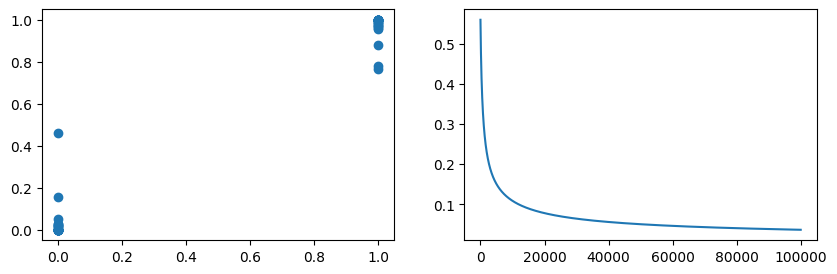

In [ ]:
for i in range(epochs):
    # Predictions, cost and gradient for each data point.
    Y_pred = sigmoid(m0 + m1 * X[:, 0] + m2 * X[:, 1])
    cost = -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    costs.append(cost)

    # Gradients for each parameter
    raw_residual = Y_pred - Y
    dm0 = np.mean(raw_residual)
    dm1 = np.mean(raw_residual * X[:, 0])
    dm2 = np.mean(raw_residual * X[:, 1])

    # Parameter updates.
    m0 = m0 - alpha * dm0
    m1 = m1 - alpha * dm1
    m2 = m2 - alpha * dm2

# Print gradients.
print('cost:', cost, '\ndm0:', dm0, '\ndm1:', dm1, '\ndm2:', dm2)
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(Y, Y_pred, 'o')

plt.subplot(1,2,2)
plt.plot(costs)

## **Vectorization**
Vectorization is an approach for solving a system of linear equations by converting them into a **matrix** product. When solving linear or logistic regression with multiple variables, vectorization is an important skill to have.

Let's say we have 3 equations, each with 3 independent variables and a constant:

$$(1): y^{(1)} = c + m_1x_1^{(1)} + m_2x_2^{(1)} + m_3x_3^{(1)}$$

$$(2): y^{(2)} = c + m_1x_2^{(2)} + m_2x_2^{(2)} + m_3x_3^{(2)}$$

$$(3): y^{(3)} = c + m_1x_3^{(3)} + m_2x_2^{(3)} + m_3x_3^{(3)}
$$

***Note**: we represent each data point or item in the sample with the superscripted number $y^{(1)}, y^{(2)}, y^{(3)}, ...y^{(n)}$, or in general $y^{(i)}$*


So to rewrite this system of linear equations in the vectorized / matrix form, it becomes:
$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}
\end{bmatrix} =
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & x_3^{(1)}\\
1 & x_1^{(2)} & x_2^{(2)} & x_3^{(2)}\\
1 & x_1^{(3)} & x_2^{(3)} & x_3^{(3)}
\end{bmatrix}
\begin{bmatrix}
c \\ m_1 \\ m_2 \\ m_3
\end{bmatrix}
$$

which can be written as:

$$Y = Xw$$

**where:**

$Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}
\end{bmatrix}$ *(the vector of all the actual values of y)*

$X =
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & x_3^{(1)}\\
1 & x_1^{(2)} & x_2^{(2)} & x_3^{(2)}\\
1 & x_1^{(3)} & x_2^{(3)} & x_3^{(3)}
\end{bmatrix}$ *(the matrix of all the independent variables $x_1, x_2, x_3, ...x_n$ for each value of $y$, with the constant bias represented by the factor 1)*

$w =
\begin{bmatrix}
c \\ m_1 \\ m_2 \\ m_3
\end{bmatrix}$ *(the vector of parameters / coefficients that make up the linear model, sometimes also called $\theta$ (theta))*

### **Vectorized Regression Equations**

So, we have a generic vectorized form for all linear equations which lends itself to easy implementation using matrix operations on the various Machine Learning frameworks. Here's a summary of the vectorized equations.

---

#### **Vectorized Linear Regression**
Linear equation: $$ŷ = X\theta$$ *(add a column of 1's to $X$ for the biases)*

Cost Function (MSE):
$$J(\theta) = \dfrac{1}{2N}\big\|{X\theta - y}\big\|^2 = \dfrac{1}{2N}\sum_{i=1}^{N}(h_\theta(x^{(i)}) - y^{(i)})^2$$

Gradient:
$$\nabla_{\theta}J = \dfrac{1}{N}X^\top(X\theta - y)$$

Batch Gradient Update:
$$\theta \leftarrow \theta - \alpha \nabla_{\theta}J = \theta - \dfrac{\alpha}{N}X^\top(X\theta - y)$$

---

#### **Vectorized Logistic Regression**
Logistic equation: $$p = \sigma(X\theta) = \dfrac{1}{1 + e^{-X\theta}}$$

Cost Function: $$L(w) = -\dfrac{1}{N}\sum_{i=1}^N{\big[y^{(i)}ln(p^{(i)}) + (1-y^{(i)})ln(1-p^{(i)})\big]}$$

Gradient: $$\nabla_{\theta}J = \dfrac{1}{N}X^{\top}(p - y)$$

Batch Gradient Update: $$\theta ← \theta - \alpha{\nabla_{\theta}J} = \theta - \dfrac{\alpha}{N}X^\top(p - y)$$.

In [ ]:
# Vectorized Implementation of Logistic Regression

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_train_gd(X, y, lr=0.1, epochs=1000, l2=0.0, tol=1e-6, verbose=False):
    """
    X: (N, d) input features (should include bias column if you want bias in weights)
    y: (N,) binary labels 0/1
    """
    N, d = X.shape
    w = np.zeros(d)            # w sometimes theta (𝜃)
    prev_loss = np.inf
    losses = []

    for epoch in range(epochs):
        # Prediction
        z = X.dot(w)               # (N,)
        p = sigmoid(z)             # (N,)

        # Loss (average logistic loss)
        eps = 1e-12   # eps (epsilon) is a very low value used to avoid divide-by-zero or log of zero errors.
        loss = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps)) + 0.5 * l2 * np.sum(w**2) # the last term is called L2 regularization

        # Gradient
        grad = (X.T.dot(p - y)) / N + l2 * w  # Shape is (d,N). Last term is L2 regularization.

        # Parameter update
        w -= lr * grad

        # Stopping condition: stop if difference btw current loss and prev loss is less than 'tol'.
        if abs(prev_loss - loss) < tol:
            if verbose:
                print(f"Converged at epoch {epoch}, loss={loss:.6f}")
            break
        prev_loss = loss
        losses.append(loss)

        if verbose and (epoch % 100 == 0):
            print(f"Epoch {epoch:4d}, loss={loss:.6f}")

    return w, losses



In [ ]:
# Logistic Regression with 3 parameters (2 coefficients and 1 constant bias)
input = "0 -1.378131 -1.739044 0 1 -0.188089 0.127572 0 2 0.726551 0.728151 1 3 0.680423 -0.678781 1 4 -1.170806 -0.705662 0 5 0.643057 0.510177 1 6 -0.364640 -0.567086 0 7 0.786642 -0.339034 1 8 -0.559277 -0.463319 0 9 0.338181 -0.844260 1 10 -1.581644 -1.462096 0 11 -0.428931 1.142782 0 12 0.603689 -0.520002 1 13 1.259862 -0.512659 1 14 -0.806196 -1.128796 0 15 0.269235 1.099966 0 16 1.314846 1.729587 1 17 2.159750 1.646843 1 18 0.544015 1.676457 0 19 -1.500738 -1.755901 0 20 -0.705409 -0.844826 0 21 -0.232155 -0.815300 1 22 2.273348 0.876674 1 23 -1.223711 0.517269 0 24 -0.045207 -0.451564 1 25 -1.854701 -1.670888 0 26 -0.191340 0.004305 0 27 0.241905 0.002186 1 28 1.128693 1.517249 1 29 -0.374702 0.549459 0 30 1.078368 -0.398300 1 31 -0.566391 0.750064 0 32 0.698139 0.008859 1 33 1.507107 0.693768 1 34 0.733770 -0.180240 1 35 -1.271291 -1.490219 0 36 -0.657197 0.456859 0 37 -1.303600 -1.468382 0 38 -0.590740 -0.021391 0 39 0.866425 -0.510817 1 40 -0.949990 -0.257228 0 41 -0.025387 -0.740762 1 42 0.409532 -0.048076 1 43 -0.225961 0.778602 0 44 -1.669467 -1.150938 0 45 -0.767975 -0.243861 0 46 0.040591 -0.018018 0 47 0.642708 0.599433 1 48 -2.420146 -1.746991 0 49 0.498193 0.132640 1"
input = input.split(" ")
X1 = np.array(input[1::4], dtype=float)
X2 = np.array(input[2::4], dtype=float)
X = np.column_stack((X1, X2))
Y = np.array(input[3::4], dtype=float)
X, Y

(array([[-1.378131e+00, -1.739044e+00],
        [-1.880890e-01,  1.275720e-01],
        [ 7.265510e-01,  7.281510e-01],
        [ 6.804230e-01, -6.787810e-01],
        [-1.170806e+00, -7.056620e-01],
        [ 6.430570e-01,  5.101770e-01],
        [-3.646400e-01, -5.670860e-01],
        [ 7.866420e-01, -3.390340e-01],
        [-5.592770e-01, -4.633190e-01],
        [ 3.381810e-01, -8.442600e-01],
        [-1.581644e+00, -1.462096e+00],
        [-4.289310e-01,  1.142782e+00],
        [ 6.036890e-01, -5.200020e-01],
        [ 1.259862e+00, -5.126590e-01],
        [-8.061960e-01, -1.128796e+00],
        [ 2.692350e-01,  1.099966e+00],
        [ 1.314846e+00,  1.729587e+00],
        [ 2.159750e+00,  1.646843e+00],
        [ 5.440150e-01,  1.676457e+00],
        [-1.500738e+00, -1.755901e+00],
        [-7.054090e-01, -8.448260e-01],
        [-2.321550e-01, -8.153000e-01],
        [ 2.273348e+00,  8.766740e-01],
        [-1.223711e+00,  5.172690e-01],
        [-4.520700e-02, -4.515640e-01],


In [ ]:
# Add a column of 1's at the beginning of X to act as the bias term
X_train = np.hstack([np.ones((len(X1),1)), X])
y_train = Y
X_train

array([[ 1.000000e+00, -1.378131e+00, -1.739044e+00],
       [ 1.000000e+00, -1.880890e-01,  1.275720e-01],
       [ 1.000000e+00,  7.265510e-01,  7.281510e-01],
       [ 1.000000e+00,  6.804230e-01, -6.787810e-01],
       [ 1.000000e+00, -1.170806e+00, -7.056620e-01],
       [ 1.000000e+00,  6.430570e-01,  5.101770e-01],
       [ 1.000000e+00, -3.646400e-01, -5.670860e-01],
       [ 1.000000e+00,  7.866420e-01, -3.390340e-01],
       [ 1.000000e+00, -5.592770e-01, -4.633190e-01],
       [ 1.000000e+00,  3.381810e-01, -8.442600e-01],
       [ 1.000000e+00, -1.581644e+00, -1.462096e+00],
       [ 1.000000e+00, -4.289310e-01,  1.142782e+00],
       [ 1.000000e+00,  6.036890e-01, -5.200020e-01],
       [ 1.000000e+00,  1.259862e+00, -5.126590e-01],
       [ 1.000000e+00, -8.061960e-01, -1.128796e+00],
       [ 1.000000e+00,  2.692350e-01,  1.099966e+00],
       [ 1.000000e+00,  1.314846e+00,  1.729587e+00],
       [ 1.000000e+00,  2.159750e+00,  1.646843e+00],
       [ 1.000000e+00,  5.44

In [ ]:
# Train using the above logistic function.
w, losses = logistic_train_gd(X_train, y_train, lr=0.1, epochs=5000, l2=1e-4, verbose=True)

Epoch    0, loss=0.693147
Epoch  100, loss=0.301052
Epoch  200, loss=0.227790
Epoch  300, loss=0.190840
Epoch  400, loss=0.167757
Epoch  500, loss=0.151645
Epoch  600, loss=0.139596
Epoch  700, loss=0.130151
Epoch  800, loss=0.122494
Epoch  900, loss=0.116125
Epoch 1000, loss=0.110723
Epoch 1100, loss=0.106067
Epoch 1200, loss=0.102001
Epoch 1300, loss=0.098413
Epoch 1400, loss=0.095218
Epoch 1500, loss=0.092349
Epoch 1600, loss=0.089758
Epoch 1700, loss=0.087401
Epoch 1800, loss=0.085249
Epoch 1900, loss=0.083272
Epoch 2000, loss=0.081451
Epoch 2100, loss=0.079765
Epoch 2200, loss=0.078200
Epoch 2300, loss=0.076743
Epoch 2400, loss=0.075383
Epoch 2500, loss=0.074109
Epoch 2600, loss=0.072913
Epoch 2700, loss=0.071789
Epoch 2800, loss=0.070729
Epoch 2900, loss=0.069728
Epoch 3000, loss=0.068781
Epoch 3100, loss=0.067884
Epoch 3200, loss=0.067033
Epoch 3300, loss=0.066225
Epoch 3400, loss=0.065455
Epoch 3500, loss=0.064721
Epoch 3600, loss=0.064022
Epoch 3700, loss=0.063353
Epoch 3800, 

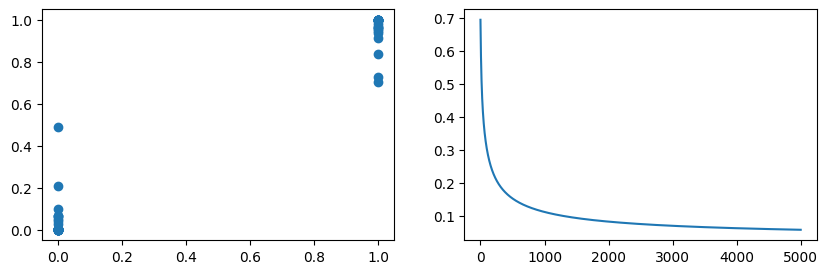

In [ ]:
y_pred = sigmoid(X_train.dot(w))
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(y_train, y_pred, 'o')

plt.subplot(1,2,2)
plt.plot(losses)